<a href="https://colab.research.google.com/github/Arsh-e-Barin-Khurshid/CognoRise-InfoTech-TASK-1-HOUSE-PRICE-PREDICTION/blob/main/CognoRise_InfoTech_TASK_1_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Setup and Installation

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

#2. Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

#3. Load Data

In [36]:
# Load your dataset
data = pd.read_csv('/content/House price.csv')

# Display first few rows
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#4. Exploratory Data Analysis (EDA)
##4.1 Data Overview

In [ ]:
# Check data info and null values
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

##4.2 Data Distribution

In [ ]:
# Print column names to verify if 'Price' exists
print(data.columns)



Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


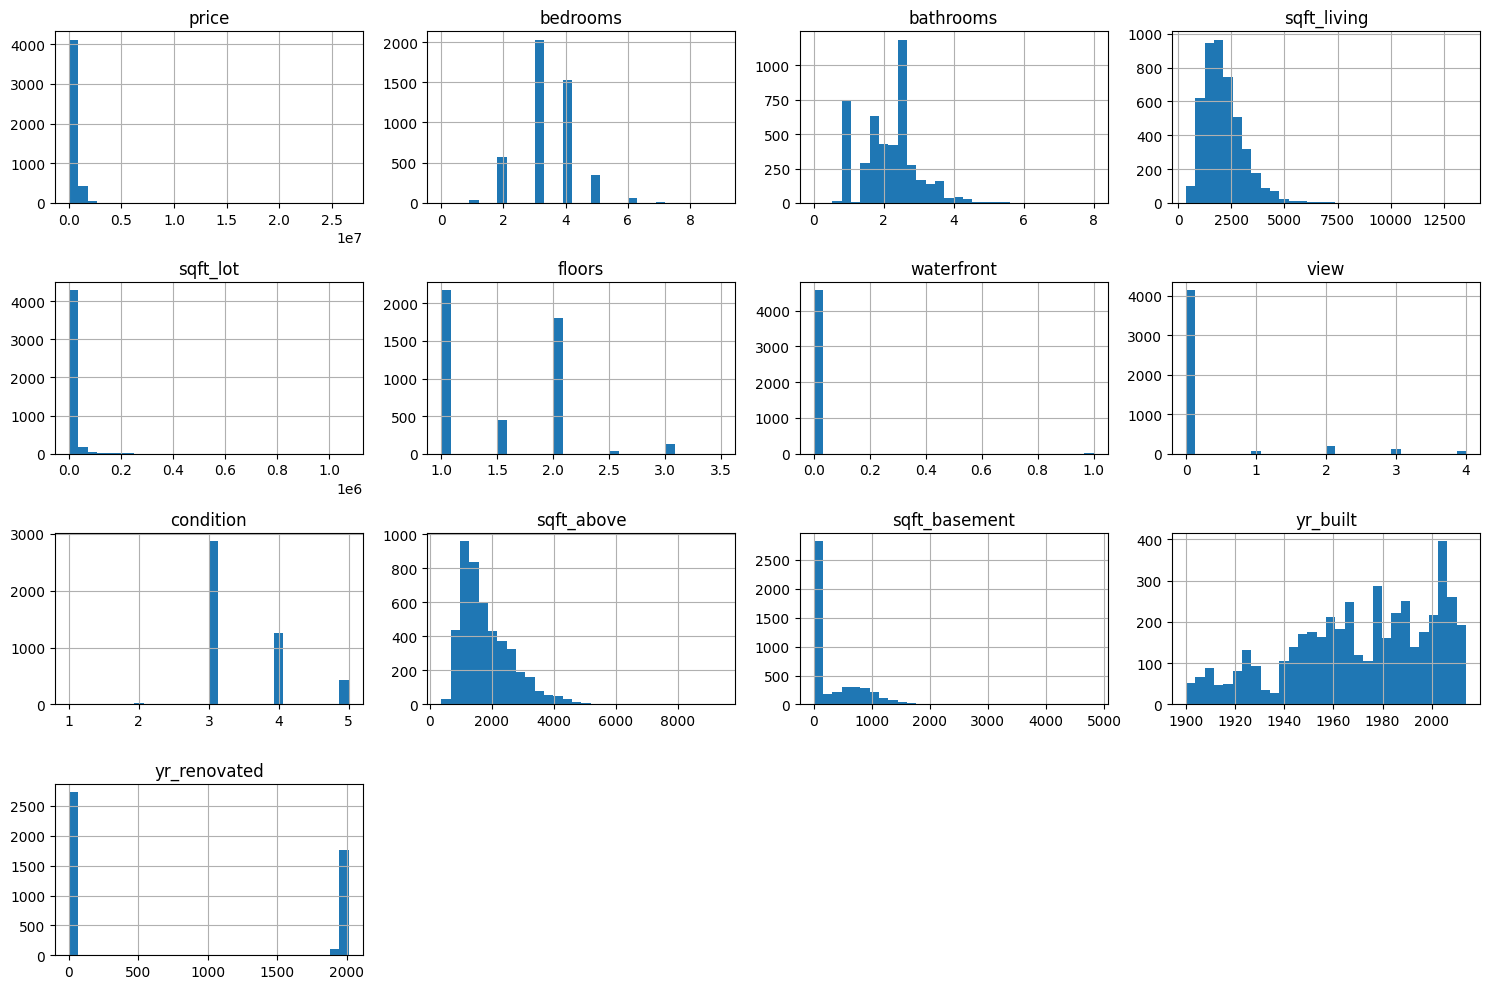

In [ ]:
# Histograms of numerical features
data.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


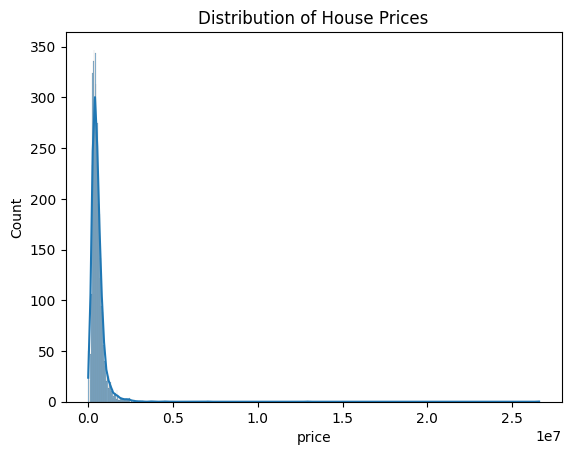

In [ ]:
# Distribution of target variable (Price)
sns.histplot(data['price'], kde=True)  # Update 'Price' to match actual column name
plt.title('Distribution of House Prices')
plt.show()

In [ ]:
# Display the first few rows of the DataFrame
print(data.head())

# Check for missing values
print(data.isnull().sum())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

##4.3 Correlation Matrix


In [ ]:
# Check the data types of each column
print(data.dtypes)


date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


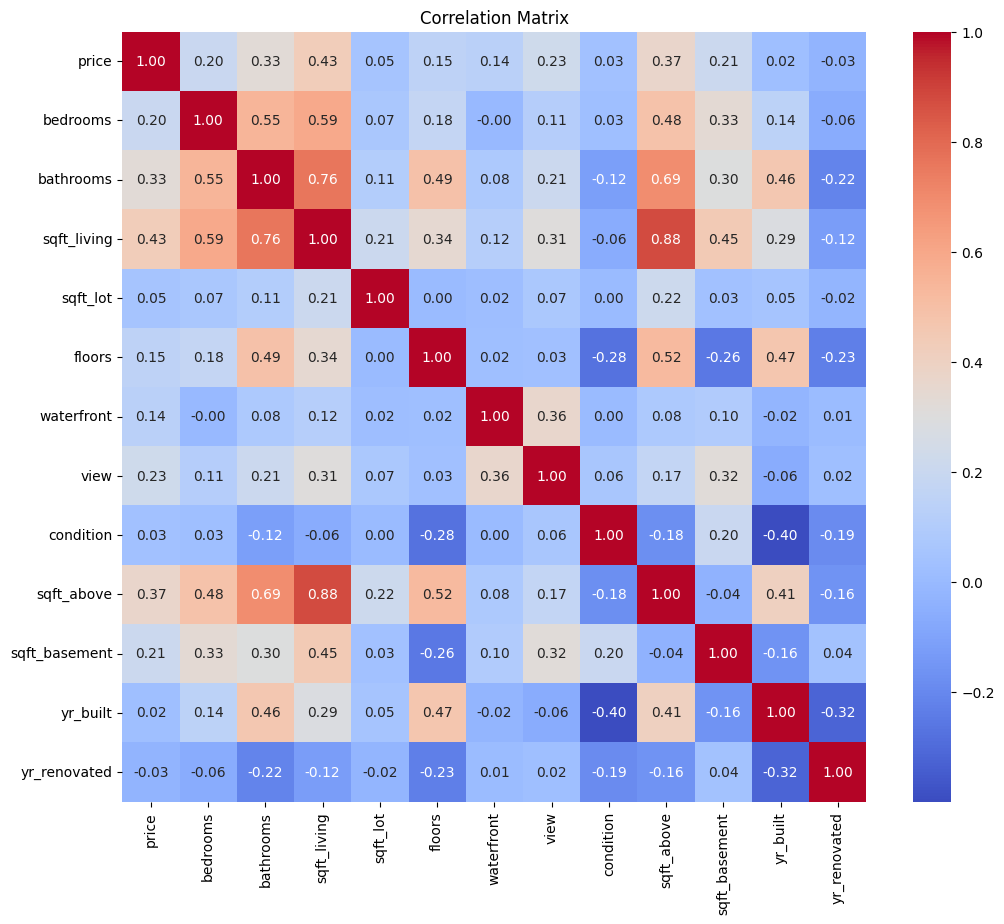

In [ ]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)


Index(['date', 'street', 'city', 'statezip', 'country'], dtype='object')


#5. Feature Selection


In [ ]:
# Define features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
            'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
target = 'price'

# Ensure features and target exist in the DataFrame
X = data[features]
y = data[target]


#6. Data Splitting


In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#7. Model Training and Prediction


In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)


#8. Model Evaluation


In [ ]:
# Define a function to evaluate models
def evaluate_model(y_test, predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)

    print(f'{model_name} Performance:')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    print()

    return mse, rmse, r2

# Evaluate models
evaluate_model(y_test, lr_predictions, 'Linear Regression')
evaluate_model(y_test, rf_predictions, 'Random Forest Regression')
evaluate_model(y_test, dt_predictions, 'Decision Tree Regression')
evaluate_model(y_test, gb_predictions, 'Gradient Boosting Regressor')


Linear Regression Performance:
Mean Squared Error: 62354799142.79
Root Mean Squared Error: 249709.43
R^2 Score: 0.65

Random Forest Regression Performance:
Mean Squared Error: 76383812660.68
Root Mean Squared Error: 276376.22
R^2 Score: 0.57

Decision Tree Regression Performance:
Mean Squared Error: 114644010610.84
Root Mean Squared Error: 338591.21
R^2 Score: 0.36

Gradient Boosting Regressor Performance:
Mean Squared Error: 86468887680.15
Root Mean Squared Error: 294055.93
R^2 Score: 0.52



(86468887680.15329, 294055.92610956385, 0.5161085021302227)

#9. Prediction Visualization
##9.1 Actual vs. Predicted Prices

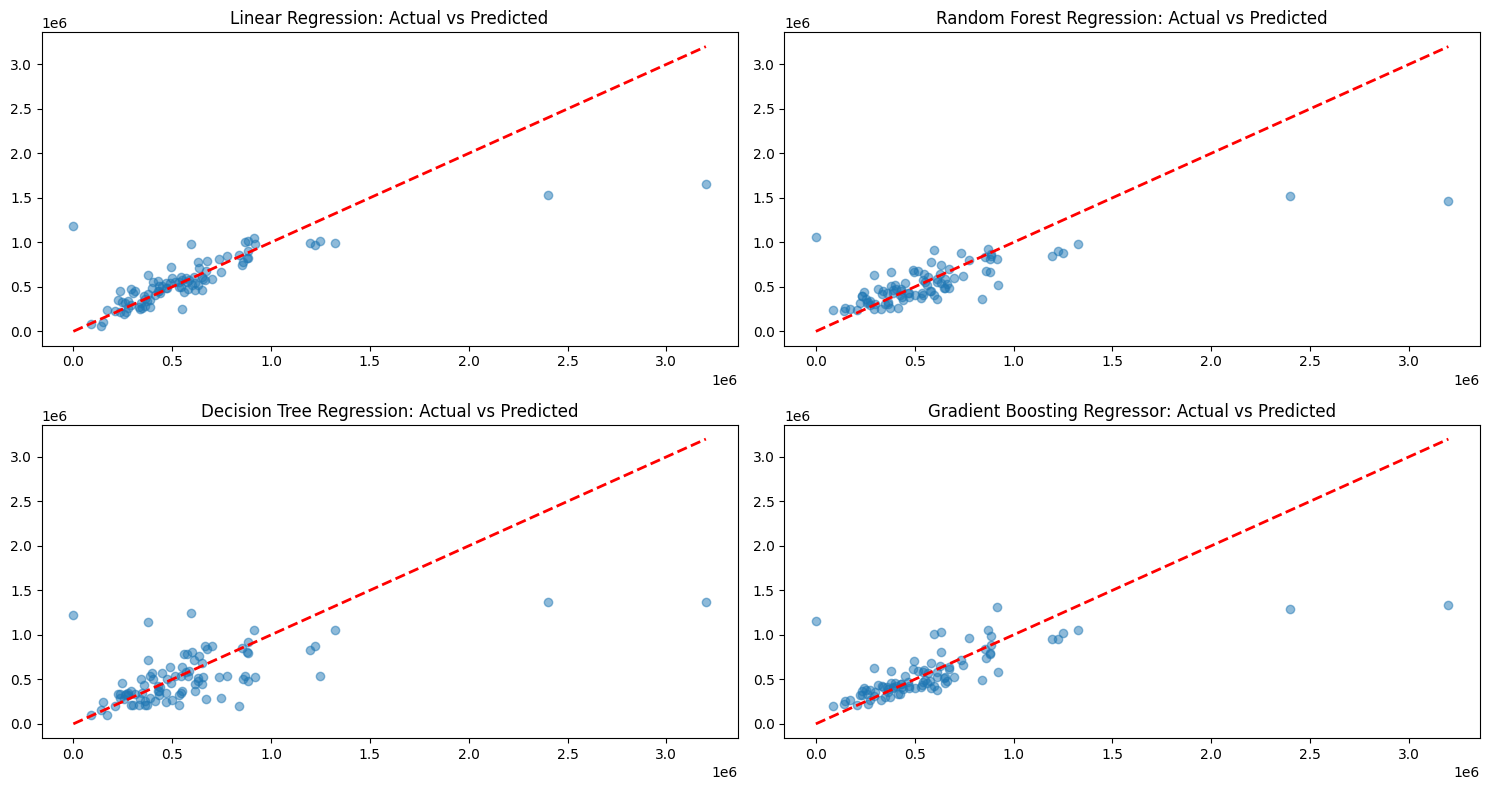

In [ ]:
# Plot actual vs. predicted prices
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Actual vs Predicted')

plt.subplot(2, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest Regression: Actual vs Predicted')

plt.subplot(2, 2, 3)
plt.scatter(y_test, dt_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Decision Tree Regression: Actual vs Predicted')

plt.subplot(2, 2, 4)
plt.scatter(y_test, gb_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Gradient Boosting Regressor: Actual vs Predicted')

plt.tight_layout()
plt.show()


##9.2 Error Distribution


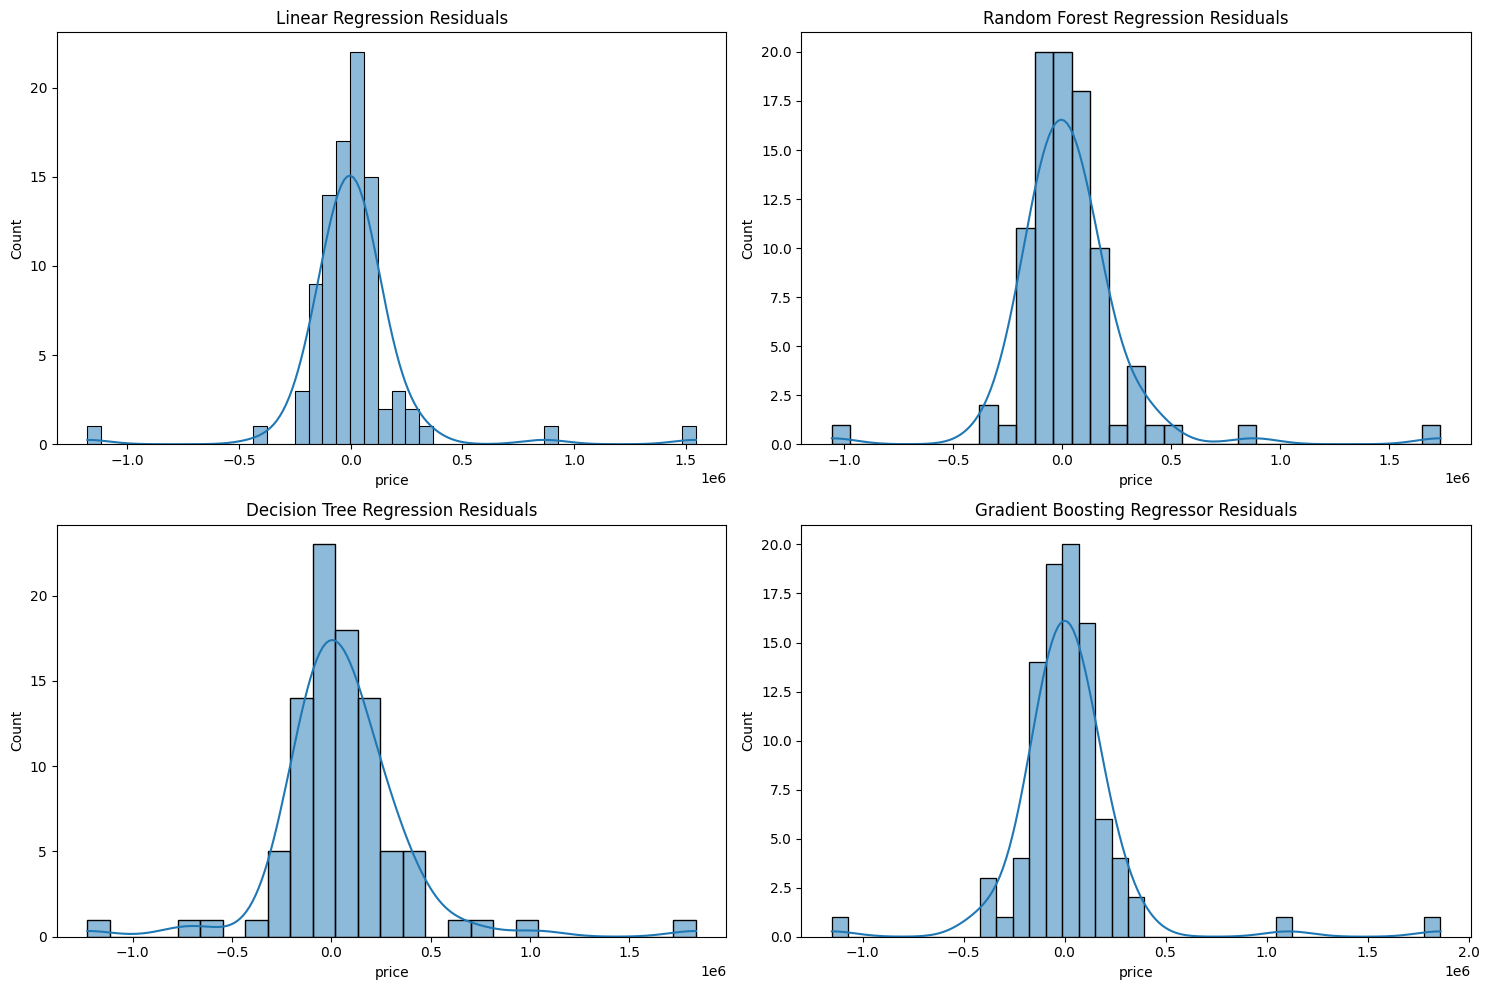

In [ ]:
# Calculate residuals
lr_residuals = y_test - lr_predictions
rf_residuals = y_test - rf_predictions
dt_residuals = y_test - dt_predictions
gb_residuals = y_test - gb_predictions

# Plot residuals
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(lr_residuals, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Linear Regression Residuals')

sns.histplot(rf_residuals, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Random Forest Regression Residuals')

sns.histplot(dt_residuals, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Decision Tree Regression Residuals')

sns.histplot(gb_residuals, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Gradient Boosting Regressor Residuals')

plt.tight_layout()
plt.show()


##9.3 Normality Check


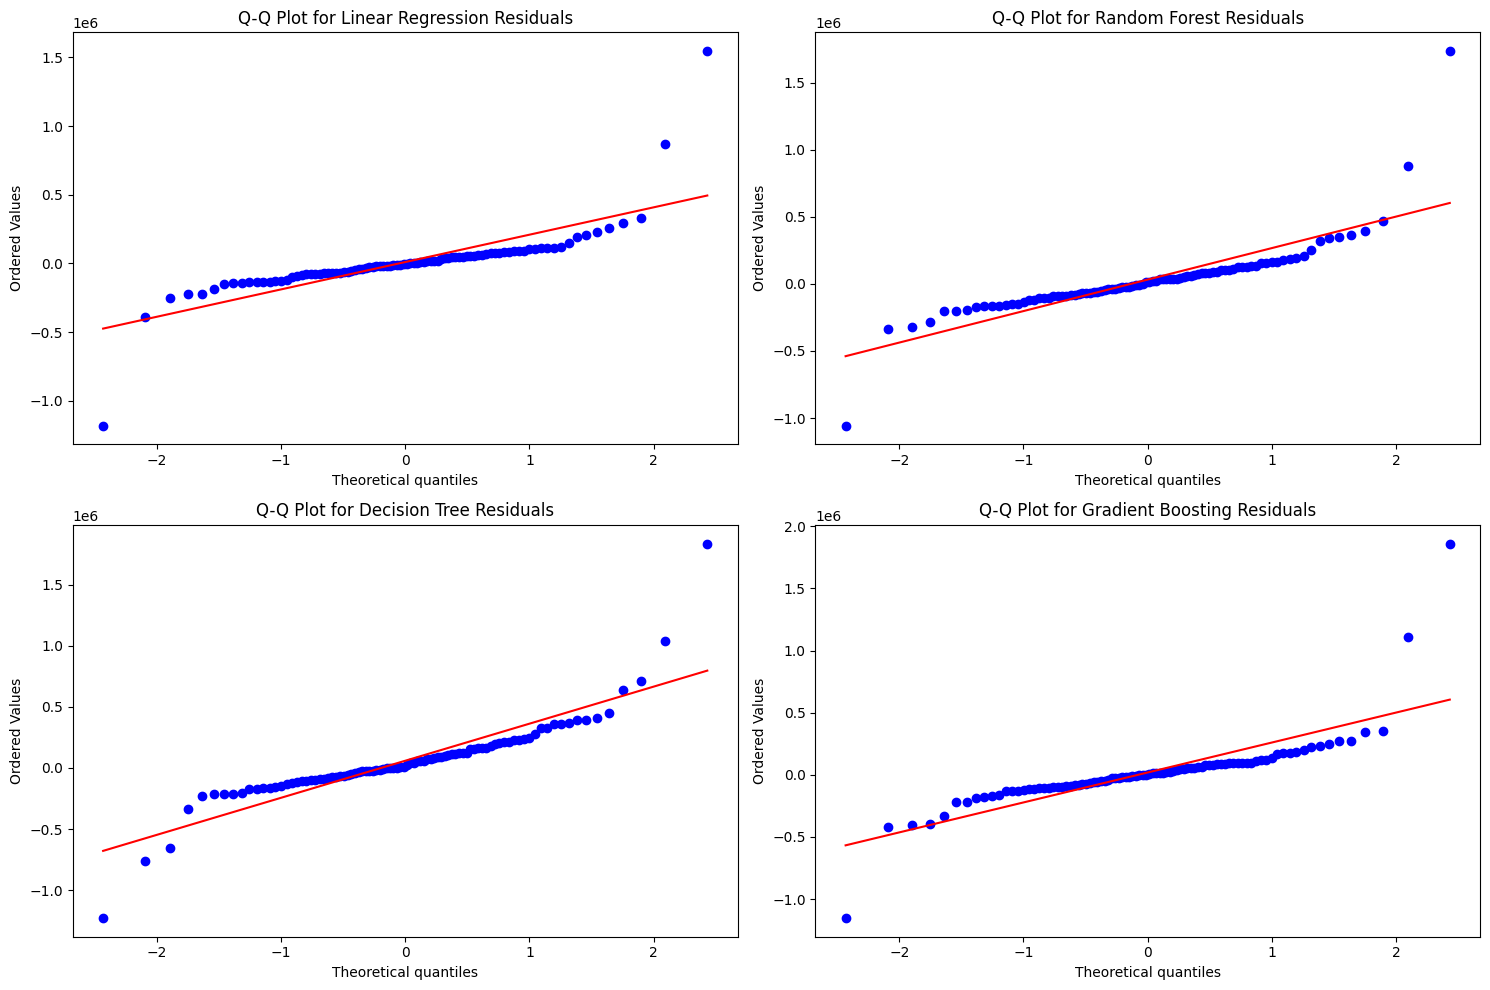

In [ ]:
# Q-Q plot for normality
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

stats.probplot(lr_residuals, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title('Q-Q Plot for Linear Regression Residuals')

stats.probplot(rf_residuals, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Q-Q Plot for Random Forest Residuals')

stats.probplot(dt_residuals, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot for Decision Tree Residuals')

stats.probplot(gb_residuals, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot for Gradient Boosting Residuals')

plt.tight_layout()
plt.show()


#10. Prediction Heatmaps
##10.1 Residual Heatmap


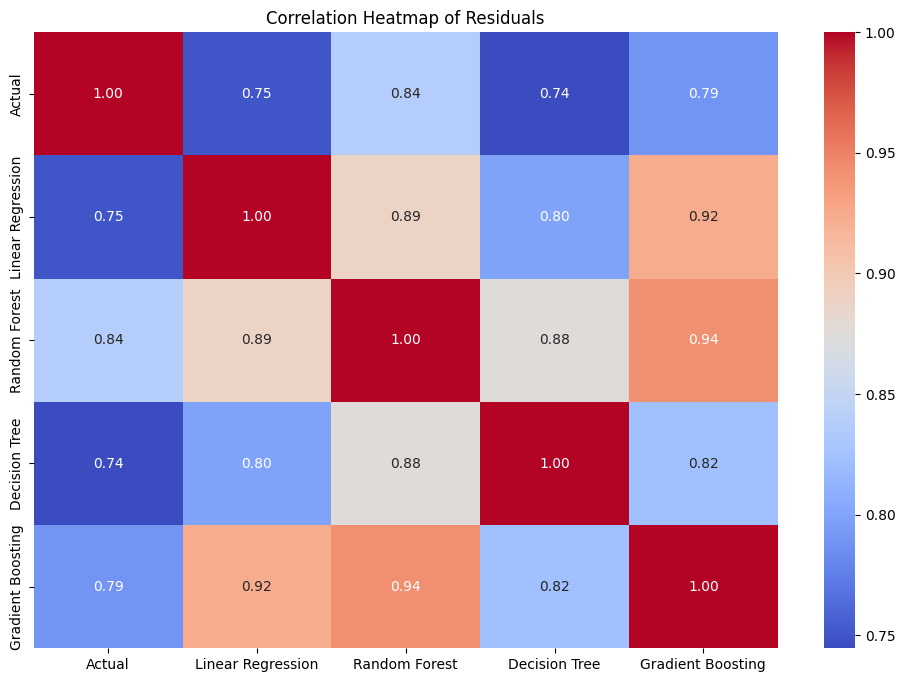

In [ ]:
# Combine actual and residuals for heatmap
residuals_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': lr_residuals,
    'Random Forest': rf_residuals,
    'Decision Tree': dt_residuals,
    'Gradient Boosting': gb_residuals
})

# Plot heatmap of residuals
plt.figure(figsize=(12, 8))
sns.heatmap(residuals_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Residuals')
plt.show()


##10.2 Predicted Prices Heatmap


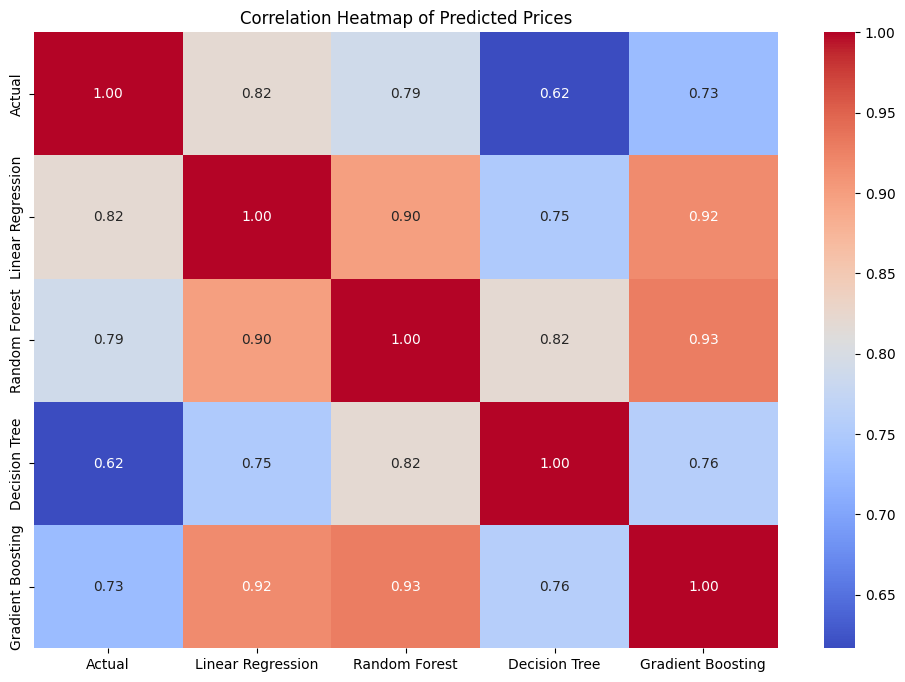

In [ ]:
# Combine actual and predicted prices for heatmap
predicted_prices_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': lr_predictions,
    'Random Forest': rf_predictions,
    'Decision Tree': dt_predictions,
    'Gradient Boosting': gb_predictions
})

# Plot heatmap of predicted prices
plt.figure(figsize=(12, 8))
sns.heatmap(predicted_prices_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Predicted Prices')
plt.show()
